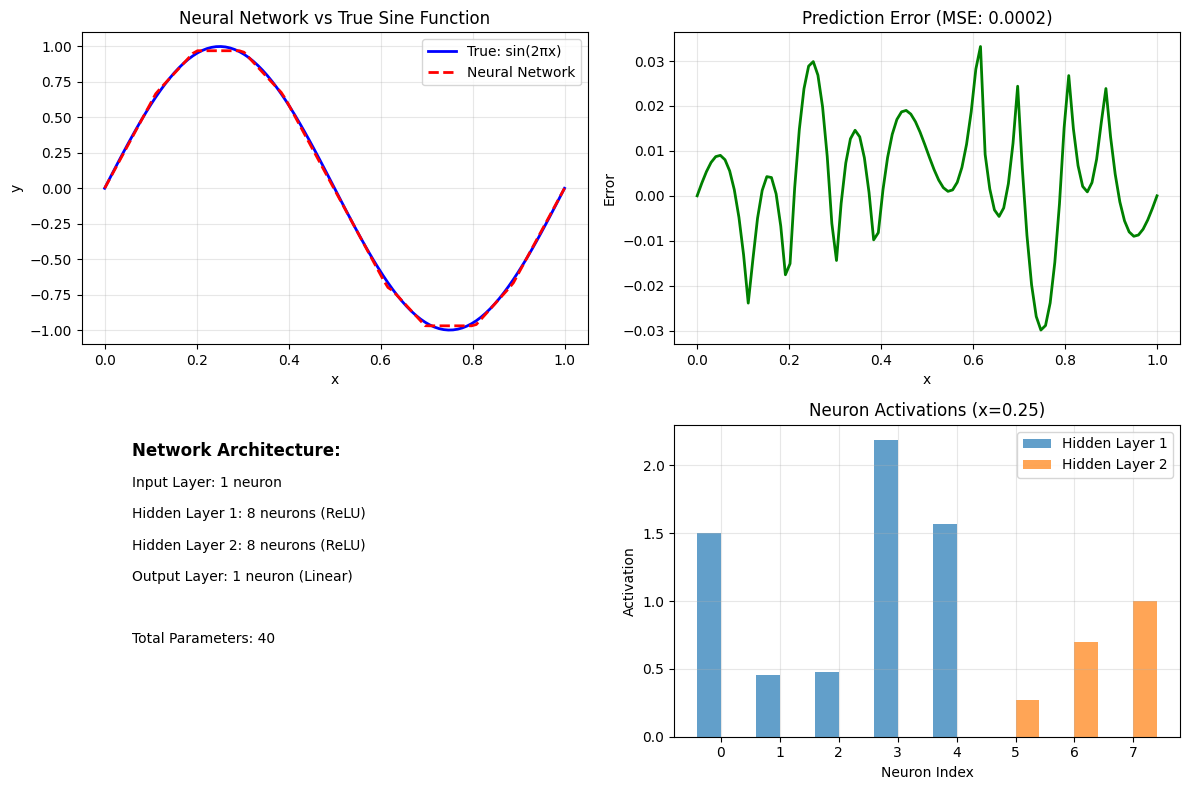

Neural Network Results:
Input range: [0, 1] with 100 points
Mean Squared Error: 0.000188
Max absolute error: 0.033231
Network output range: [-0.970, 0.970]
True sine range: [-1.000, 1.000]

Sample Predictions:
x=0.000: True=0.000, Predicted=0.000, Error=0.000
x=0.253: True=1.000, Predicted=0.970, Error=0.030
x=0.505: True=-0.032, Predicted=-0.040, Error=0.009
x=0.758: True=-0.999, Predicted=-0.970, Error=-0.029
x=1.000: True=-0.000, Predicted=-0.000, Error=-0.000


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleNeuralNetwork:
    def __init__(self):
        # Network architecture: 1 -> 8 -> 8 -> 1
        # Weights and biases as provided
        self.weights1 = np.array([6, 3.5, -3.5, -6, -3.5, 3.6, 6, 0])
        self.biases1 = np.array([0, -0.42, 1.35, 3.69, 2.44, -2.9, -5.3, 0])
        self.weights2 = np.array([-1, -1, -1, -1, -1, -1, -1, 0])
        self.biases2 = np.array([0.7, 0.27, 0.3, 1.37, 0.27, 0.27, 0.7, 1])
        self.weights3 = np.array([-1, -1, -1, -1, -1, -1, -1, 1.94])
    
    def relu(self, x):
        """Rectified Linear Unit activation function"""
        return np.maximum(0, x)
    
    def linear(self, x):
        """Linear activation function (identity)"""
        return x
    
    def forward(self, x):
        """Forward pass through the network"""
        # Input to first hidden layer
        z1 = x * self.weights1 + self.biases1
        a1 = self.relu(z1)
        
        # First hidden layer to second hidden layer
        z2 = a1 * self.weights2 + self.biases2
        a2 = self.relu(z2)
        
        # Second hidden layer to output
        z3 = np.dot(a2, self.weights3)
        output = self.linear(z3)
        
        return output
    
    def predict(self, x_values):
        """Predict for an array of input values"""
        predictions = []
        for x in x_values:
            pred = self.forward(x)
            predictions.append(pred)
        return np.array(predictions)

def main():
    # Create the neural network
    nn = SimpleNeuralNetwork()
    
    # Generate 100 input values between 0 and 1
    x_input = np.linspace(0, 1, 100)
    
    # True sine function values
    y_true = np.sin(2 * np.pi * x_input)
    
    # Neural network predictions
    y_pred = nn.predict(x_input)
    
    # Calculate mean squared error
    mse = np.mean((y_true - y_pred)**2)
    
    # Plotting
    plt.figure(figsize=(12, 8))
    
    # Plot 1: Comparison of true sine and NN output
    plt.subplot(2, 2, 1)
    plt.plot(x_input, y_true, 'b-', label='True: sin(2πx)', linewidth=2)
    plt.plot(x_input, y_pred, 'r--', label='Neural Network', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Neural Network vs True Sine Function')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Error analysis
    plt.subplot(2, 2, 2)
    error = y_true - y_pred
    plt.plot(x_input, error, 'g-', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('Error')
    plt.title(f'Prediction Error (MSE: {mse:.4f})')
    plt.grid(True, alpha=0.3)
    
    # Plot 3: Network architecture visualization
    plt.subplot(2, 2, 3)
    plt.text(0.1, 0.9, 'Network Architecture:', fontsize=12, fontweight='bold')
    plt.text(0.1, 0.8, 'Input Layer: 1 neuron', fontsize=10)
    plt.text(0.1, 0.7, 'Hidden Layer 1: 8 neurons (ReLU)', fontsize=10)
    plt.text(0.1, 0.6, 'Hidden Layer 2: 8 neurons (ReLU)', fontsize=10)
    plt.text(0.1, 0.5, 'Output Layer: 1 neuron (Linear)', fontsize=10)
    plt.text(0.1, 0.3, f'Total Parameters: {len(nn.weights1) + len(nn.biases1) + len(nn.weights2) + len(nn.biases2) + len(nn.weights3)}', fontsize=10)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axis('off')
    
    # Plot 4: Activation analysis for a sample input
    plt.subplot(2, 2, 4)
    sample_x = 0.25  # Sample input
    z1 = sample_x * nn.weights1 + nn.biases1
    a1 = nn.relu(z1)
    z2 = a1 * nn.weights2 + nn.biases2
    a2 = nn.relu(z2)
    
    neurons = np.arange(8)
    plt.bar(neurons - 0.2, a1, 0.4, label='Hidden Layer 1', alpha=0.7)
    plt.bar(neurons + 0.2, a2, 0.4, label='Hidden Layer 2', alpha=0.7)
    plt.xlabel('Neuron Index')
    plt.ylabel('Activation')
    plt.title(f'Neuron Activations (x={sample_x})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print results
    print(f"Neural Network Results:")
    print(f"Input range: [0, 1] with {len(x_input)} points")
    print(f"Mean Squared Error: {mse:.6f}")
    print(f"Max absolute error: {np.max(np.abs(error)):.6f}")
    print(f"Network output range: [{np.min(y_pred):.3f}, {np.max(y_pred):.3f}]")
    print(f"True sine range: [{np.min(y_true):.3f}, {np.max(y_true):.3f}]")
    
    # Show some sample predictions
    print("\nSample Predictions:")
    for i in [0, 25, 50, 75, 99]:
        print(f"x={x_input[i]:.3f}: True={y_true[i]:.3f}, Predicted={y_pred[i]:.3f}, Error={error[i]:.3f}")

if __name__ == "__main__":
    main()